In [2]:
import tensorflow.keras as tk
import random
import collections
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def display_random_images_with_labels(d, n=10):
    """
        accept dataset in tuple form, first index
        is np arrays (images) and second is labels
        and display n random images with labels
        from it
        Inputs:
            d (tuple): dataset images, dataset labels on same indexs
            n (int): number of samples to display (default: 10)
        Output:
            None
    """
    choices = list(range(len(d[0])))
    for i in range(n):
        index = random.choice(choices)
        choices.remove(index)
        print("index:",index)
        print("Lable:",d[1][index])
        plt.imshow(d[0][index], cmap='gray')
        plt.show()

In [4]:
dataset = tk.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [5]:
print("There are",len(dataset[0][0]),"images in training dataset")

print("There are",len(dataset[1][0]),"images in training dataset")

print("___________________")

There are 60000 images in training dataset
There are 10000 images in training dataset
___________________


In [6]:
print(dataset[0][0][0].shape)

print("___________________")

(28, 28)
___________________


Randomly printing 10 images with labels from training dataset
index: 50695
Lable: 2


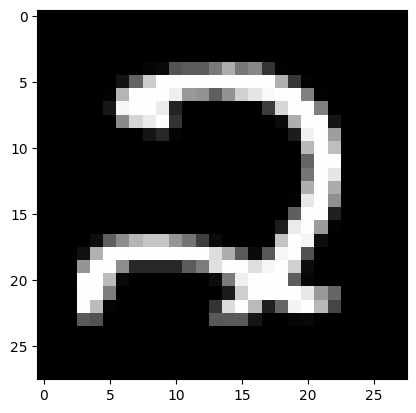

index: 34177
Lable: 0


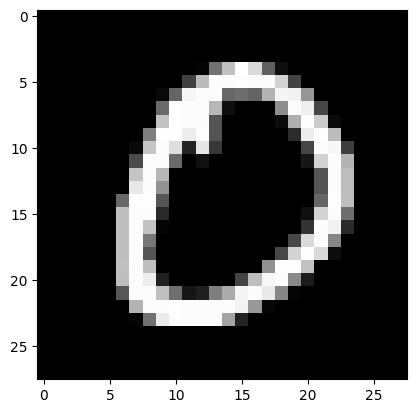

index: 28933
Lable: 7


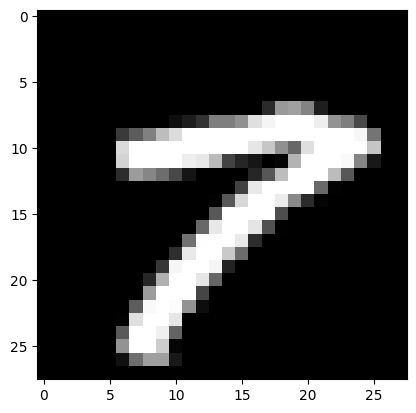

index: 22358
Lable: 2


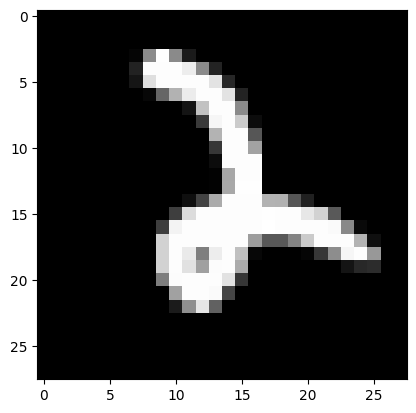

index: 154
Lable: 9


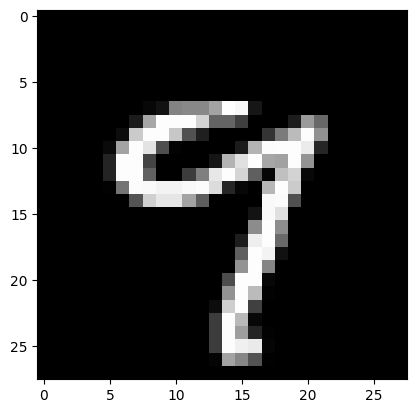

index: 40275
Lable: 8


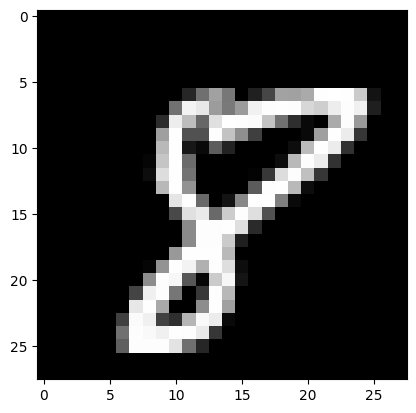

index: 42936
Lable: 2


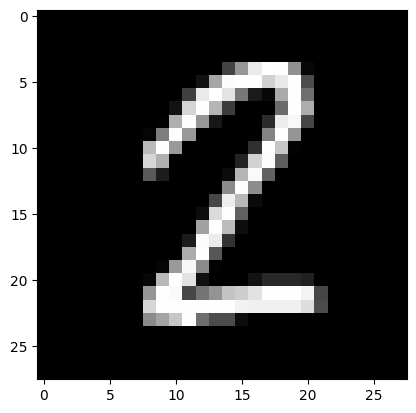

index: 53648
Lable: 8


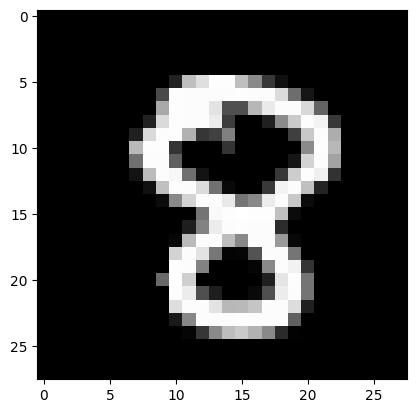

index: 43615
Lable: 1


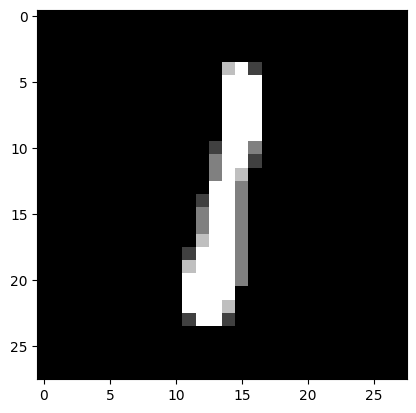

index: 22198
Lable: 2


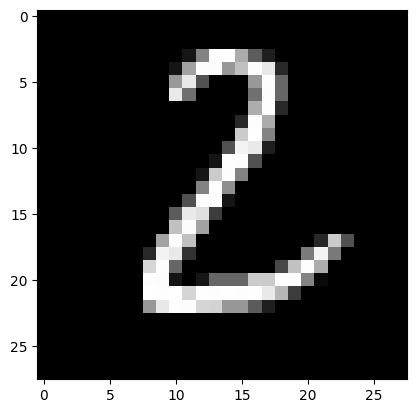

___________________


In [7]:
print("Randomly printing 10 images with labels from training dataset")

display_random_images_with_labels(dataset[0])

print("___________________")

Randomly printing 10 images with labels from testing dataset
index: 31410
Lable: 0


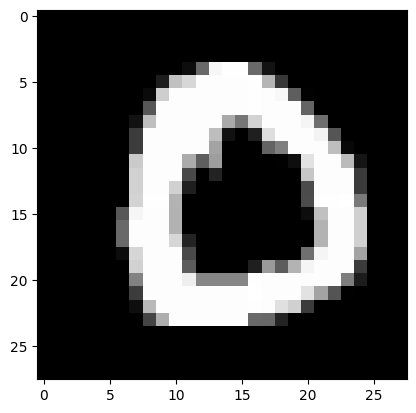

index: 40853
Lable: 2


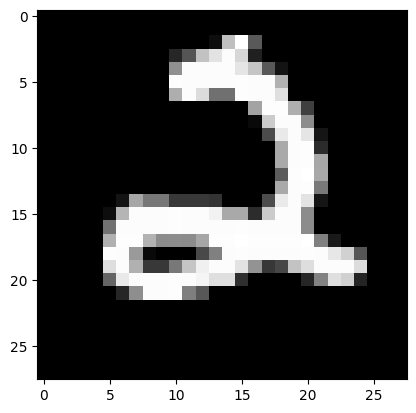

index: 41294
Lable: 2


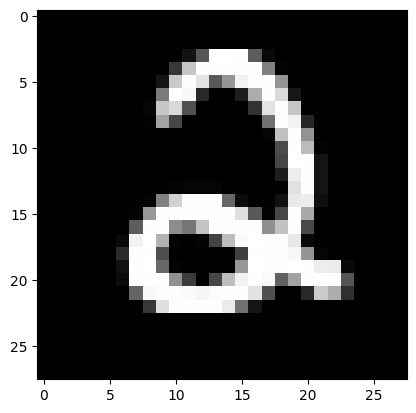

index: 32264
Lable: 2


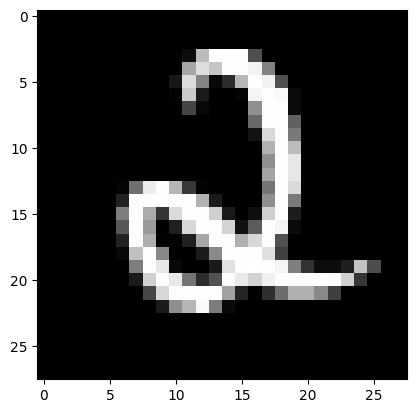

index: 55118
Lable: 8


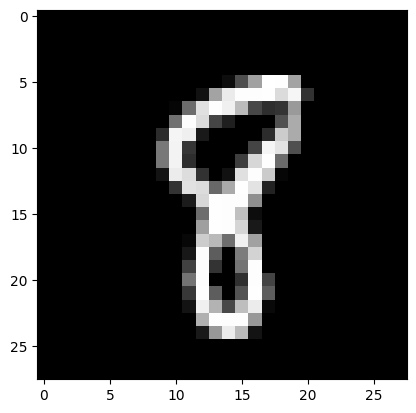

index: 37260
Lable: 3


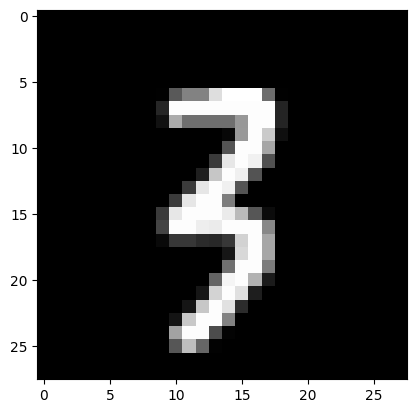

index: 24591
Lable: 2


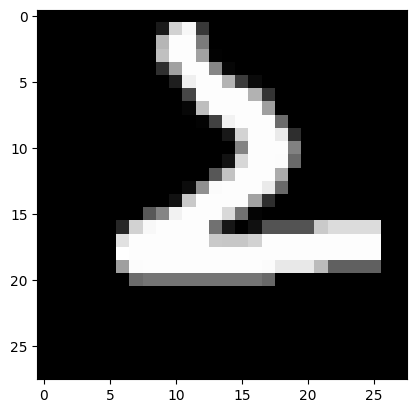

index: 22291
Lable: 6


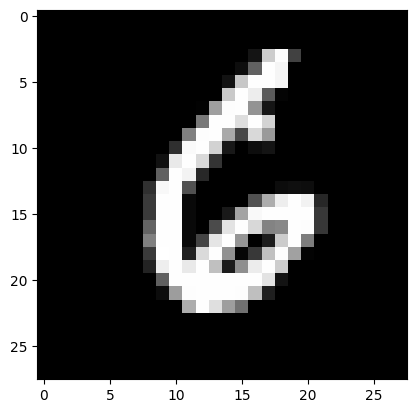

index: 51880
Lable: 8


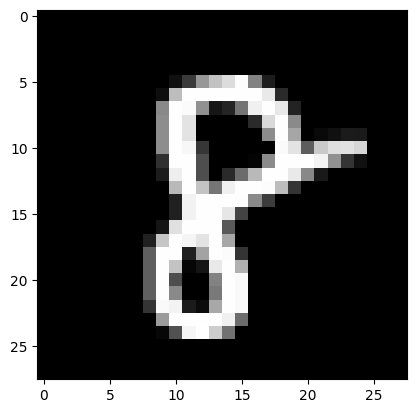

index: 45525
Lable: 9


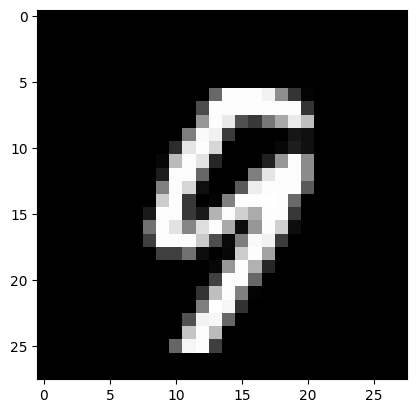

___________________


In [8]:
print("Randomly printing 10 images with labels from testing dataset")

display_random_images_with_labels(dataset[0])

print("___________________")

In [9]:
print("There are",len(dataset[0][1]),"labels in training dataset for",len(dataset[0][0]),"images in training dataset")

print("There are",len(dataset[1][1]),"labels in training dataset for",len(dataset[1][0]),"images in training dataset")

print("___________________")

There are 60000 labels in training dataset for 60000 images in training dataset
There are 10000 labels in training dataset for 10000 images in training dataset
___________________


In [10]:
print("There are", len(set(dataset[0][1])),"unique classes in training dataset")

There are 10 unique classes in training dataset


In [11]:
print("Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)")

Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)


In [12]:
display(collections.Counter(dataset[0][1]))

Counter({5: 5421,
         0: 5923,
         4: 5842,
         1: 6742,
         9: 5949,
         2: 5958,
         3: 6131,
         6: 5918,
         7: 6265,
         8: 5851})

In [13]:
print("There are", len(set(dataset[1][1])),"unique classes in validation dataset")

There are 10 unique classes in validation dataset


In [14]:
print("Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)")

Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)


In [15]:
display(collections.Counter(dataset[1][1]))

print("__________")

Counter({7: 1028,
         2: 1032,
         1: 1135,
         0: 980,
         4: 982,
         9: 1009,
         5: 892,
         6: 958,
         3: 1010,
         8: 974})

__________


In [17]:
tr_inst_count = 600
ts_inst_count = 100

In [18]:
#creating a empty list for store new dataset
new_tr_imgs = []
new_tr_lbls = []
new_ts_imgs = []
new_ts_lbls = []

In [25]:
def reduce_instances_by_class(images, labels, instance_count):
  freq_dict = {i: 0 for i in range(10)}
  # Counting frequency of classes in existing dataset
  for lbl in labels:
    freq_dict[lbl] += 1

# Creating a list to store indices of selected instances for each class
  selected_indices = []
  for i in range(10):
    # Indices of instances belonging to the ith class
     index_list = np.where(np.array(labels) == i)[0]
    # Choosing a random subset of indices of size instance_count
     selected_indices_i = np.random.choice(index_list, instance_count, replace=False)
    # Appending the subset indices to the main list of selected indices
     selected_indices.extend(selected_indices_i)

# Extracting the images and labels of selected instances from the original images and labels arrays
  new_images = images[selected_indices]
  new_labels = labels[selected_indices]

  return new_images, new_labels


  
                   

In [26]:
new_tr_imgs, new_tr_lbls = reduce_instances_by_class(dataset[0][0], dataset[0][1], tr_inst_count)

In [27]:
new_ts_imgs, new_ts_lbls = reduce_instances_by_class(dataset[1][0], dataset[1][1], ts_inst_count)

In [28]:
new_dataset = (new_tr_imgs, new_tr_lbls), (new_ts_imgs, new_ts_lbls)

In [30]:
print("Reduced Training Dataset Size: ", len(new_dataset[0][1])) 
print("Reduced Testing Dataset Size: ", len(new_dataset[1][1]))

Reduced Training Dataset Size:  6000
Reduced Testing Dataset Size:  1000


In [32]:
print("Breakdown of each label in the new training dataset is below:")
display(collections.Counter(new_dataset[0][1]))



Breakdown of each label in the new training dataset is below:


Counter({0: 600,
         1: 600,
         2: 600,
         3: 600,
         4: 600,
         5: 600,
         6: 600,
         7: 600,
         8: 600,
         9: 600})

In [33]:
print("Breakdown of each label in the new testing dataset is below:")
display(collections.Counter(new_dataset[1][1]))

Breakdown of each label in the new testing dataset is below:


Counter({0: 100,
         1: 100,
         2: 100,
         3: 100,
         4: 100,
         5: 100,
         6: 100,
         7: 100,
         8: 100,
         9: 100})

Randomly printing 10 images with labels from training dataset
index: 4805
Lable: 8


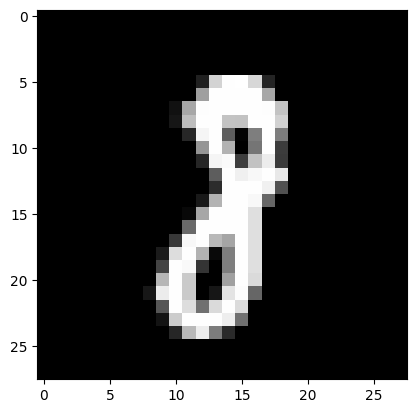

index: 1482
Lable: 2


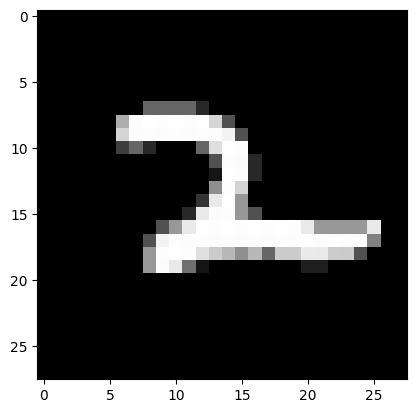

index: 2281
Lable: 3


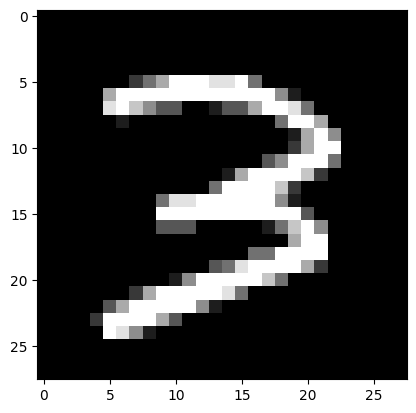

index: 4547
Lable: 7


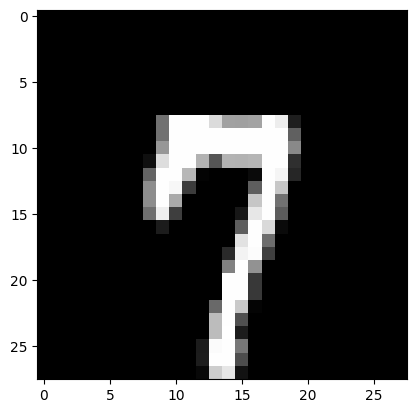

index: 3712
Lable: 6


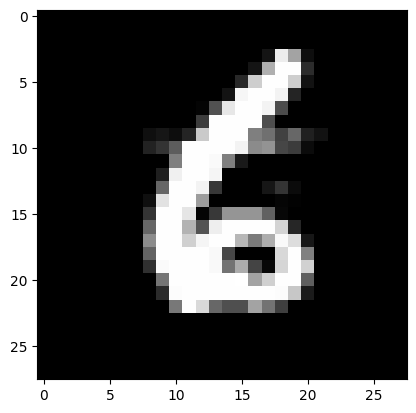

index: 2699
Lable: 4


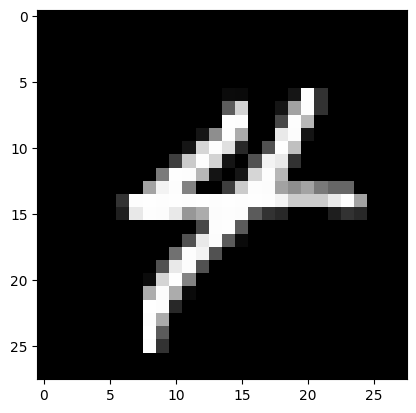

index: 1963
Lable: 3


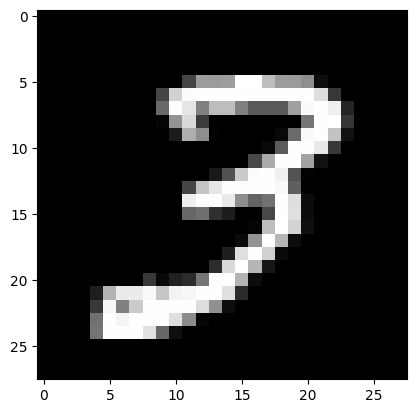

index: 4388
Lable: 7


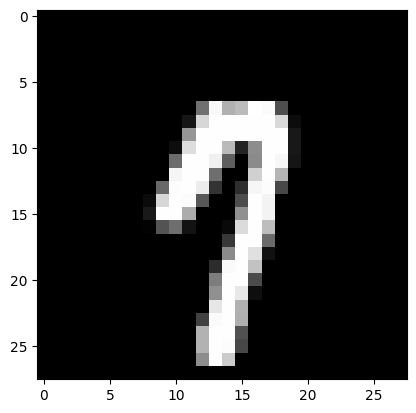

index: 5873
Lable: 9


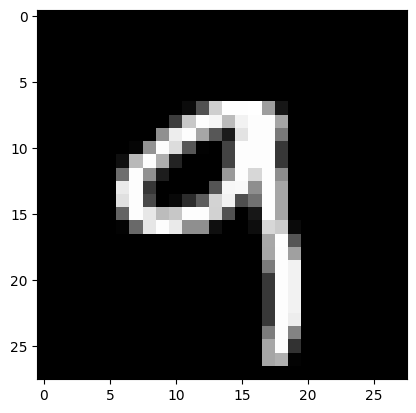

index: 790
Lable: 1


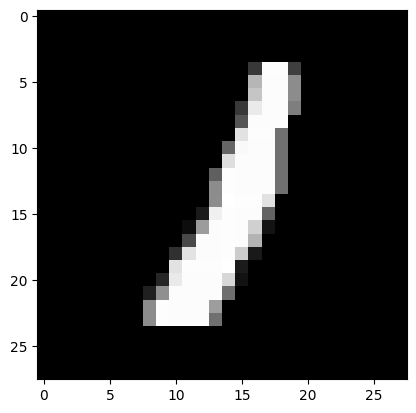

In [34]:
print("Randomly printing 10 images with labels from training dataset") 
display_random_images_with_labels(new_dataset[0])



Randomly printing 10 images with labels from testing dataset
index: 280
Lable: 2


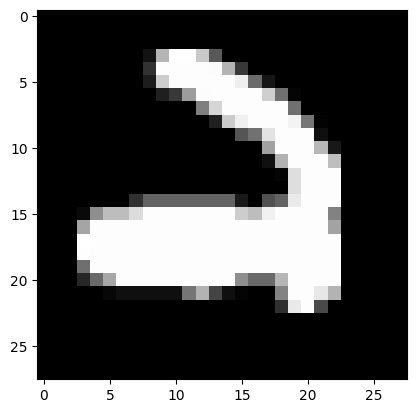

index: 30
Lable: 0


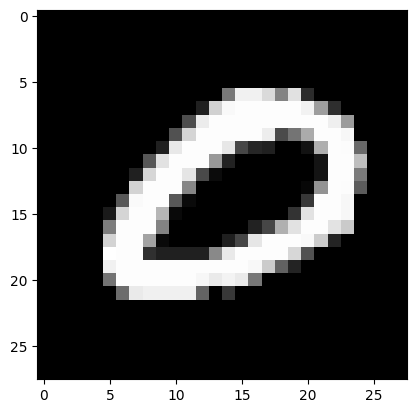

index: 648
Lable: 6


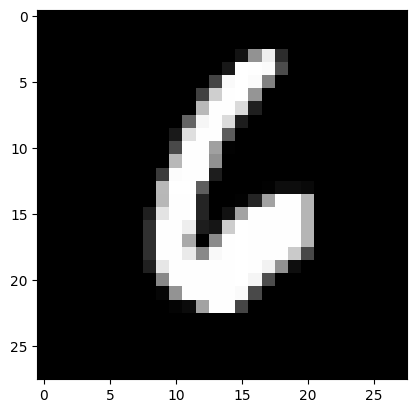

index: 603
Lable: 6


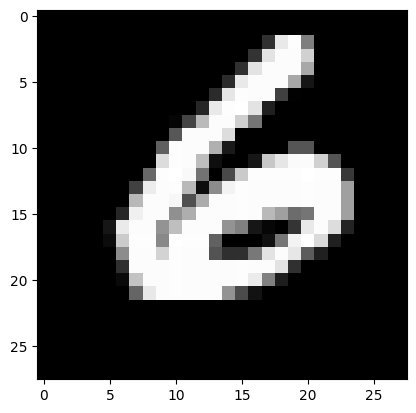

index: 318
Lable: 3


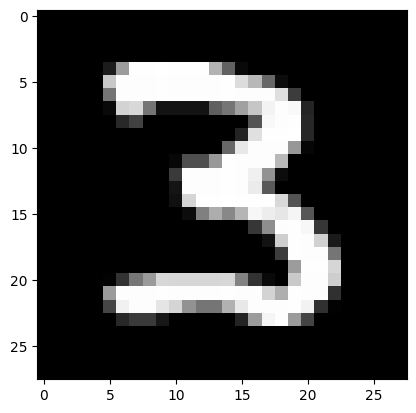

index: 773
Lable: 7


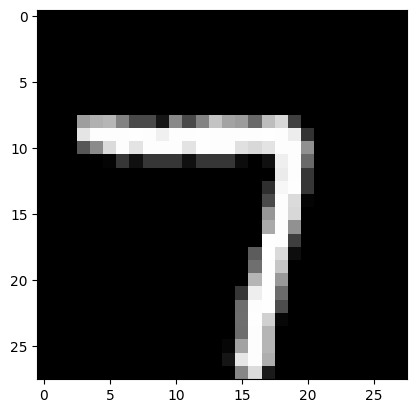

index: 951
Lable: 9


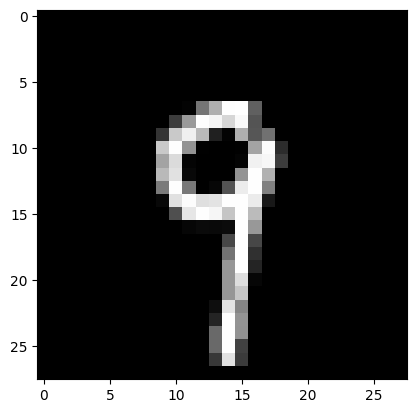

index: 144
Lable: 1


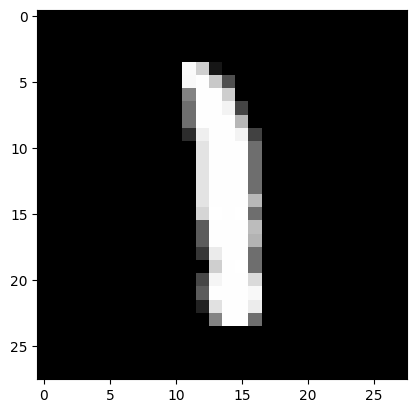

index: 39
Lable: 0


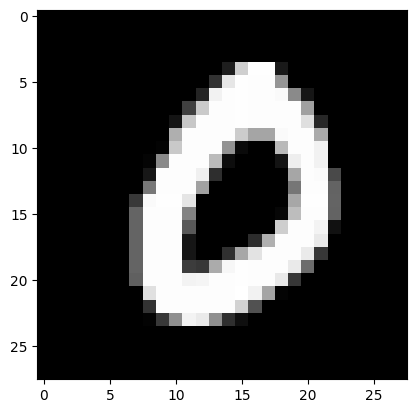

index: 266
Lable: 2


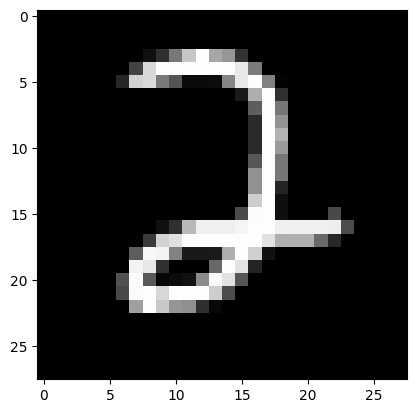

In [35]:
print("Randomly printing 10 images with labels from testing dataset") 
display_random_images_with_labels(new_dataset[1])